# Imports

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.preparation.obtained_text_da import ObtainedTextDA

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Data obtaining

In [5]:
texts = ObtainedTextDA().select_all_as_dataframe().drop(columns=['cluster_grade'])
texts

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,1.927354,1.037806,61.082283,4.892513,51.297257,1.927354,0.086735,0.030246,0.244898,0.074469,...,3.706449,0.000000,2.223870,49.073388,58.561898,113.120830,Comunicación,Ruta_castellano_inicial.txt,1.0,1.0
1,1.282599,1.282599,64.557503,8.978196,51.303976,1.710133,0.013100,0.005898,0.091703,0.065860,...,0.855066,0.000000,0.000000,29.072253,69.687901,96.194955,Comunicación,abecedario.txt,1.0,2.0
2,1.993024,0.996512,66.517190,6.228201,55.057299,2.242152,0.026515,0.016618,0.231061,0.100263,...,1.743896,0.000000,0.000000,28.151470,52.815147,78.475336,Comunicación,aguita-vida.txt,1.0,3.0
3,2.695418,2.695418,72.776280,2.695418,37.735849,26.954178,0.000000,0.003916,0.019231,0.029548,...,2.695418,0.000000,0.000000,75.471698,13.477089,13.477089,Comunicación,antes-muy-antes.txt,1.0,4.0
4,2.023547,1.655629,59.234731,5.886681,48.749080,0.919794,0.038202,0.009743,0.175281,0.046130,...,8.462104,0.367918,5.334805,21.155261,59.418690,79.286240,Comunicación,antologia-de-poesia-para-ninos-y-ninas.txt,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.391450,0.939228,58.406095,5.878874,49.639962,0.556580,0.024795,0.005598,0.135532,0.013851,...,13.879709,0.869656,7.792117,22.889345,73.085887,105.680593,Formación Ciudadana y Cívica,trabajo-emprendimiento-unidad-4-portafolio-3-a...,3.0,292.0
288,3.102290,1.559715,56.406828,9.358289,40.998217,1.388318,0.038963,0.015879,0.190970,0.025472,...,4.627725,0.737008,4.593446,28.246264,66.947758,89.349376,Formación Ciudadana y Cívica,trabajo-emprendimiento-unidad-4-texto-1-avanza...,3.0,293.0
289,3.484193,1.878911,57.954359,8.591912,42.886590,1.112753,0.040149,0.016301,0.180934,0.025914,...,5.855634,0.310111,4.067933,26.268265,70.614203,96.608840,Formación Ciudadana y Cívica,trabajo-emprendimiento-unidad-4-texto-2-avanza...,3.0,294.0
290,2.263993,1.160534,57.570108,9.170123,44.138351,0.837107,0.036862,0.012648,0.160552,0.022459,...,7.457859,0.646855,5.327042,21.289144,70.640387,97.256573,Formación Ciudadana y Cívica,trabajo-emprendimiento-unidad-4-texto-3-avanza...,3.0,295.0


# EDA

## Null checking

In [6]:
texts.isna().sum()

CNCADC      1
CNCAdd      1
CNCAll      1
CNCCaus     1
CNCLogic    1
CNCTemp     1
CRFANP1     4
CRFANPa     4
CRFAO1      4
CRFAOa      4
CRFCWO1     4
CRFCWO1d    4
CRFCWOa     4
CRFCWOad    4
CRFNO1      4
CRFNOa      4
CRFSO1      4
CRFSOa      4
DESPC       0
DESPL       0
DESPLd      0
DESSC       0
DESSL       0
DESSLd      0
DESWC       0
DESWLlt     1
DESWLltd    1
DESWLsy     1
DESWLsyd    1
DRNEG       1
DRNP        1
DRVP        1
LDTTRa      4
LDTTRcw     4
RDFHGL      4
SYNLE       1
SYNNP       1
WRDADJ      1
WRDADV      1
WRDNOUN     1
WRDPRO      1
WRDPRP1p    1
WRDPRP1s    1
WRDPRP2p    1
WRDPRP2s    1
WRDPRP3p    1
WRDPRP3s    1
WRDVERB     1
category    0
filename    0
grade       0
id          0
dtype: int64

We can see that are at least four documents that couldn't be analyzed correctly by the text complexity analyzer library. This happened because of problems with the files. Those records won't be used.

In [7]:
texts.dropna(inplace=True)
texts.isna().sum()

CNCADC      0
CNCAdd      0
CNCAll      0
CNCCaus     0
CNCLogic    0
CNCTemp     0
CRFANP1     0
CRFANPa     0
CRFAO1      0
CRFAOa      0
CRFCWO1     0
CRFCWO1d    0
CRFCWOa     0
CRFCWOad    0
CRFNO1      0
CRFNOa      0
CRFSO1      0
CRFSOa      0
DESPC       0
DESPL       0
DESPLd      0
DESSC       0
DESSL       0
DESSLd      0
DESWC       0
DESWLlt     0
DESWLltd    0
DESWLsy     0
DESWLsyd    0
DRNEG       0
DRNP        0
DRVP        0
LDTTRa      0
LDTTRcw     0
RDFHGL      0
SYNLE       0
SYNNP       0
WRDADJ      0
WRDADV      0
WRDNOUN     0
WRDPRO      0
WRDPRP1p    0
WRDPRP1s    0
WRDPRP2p    0
WRDPRP2s    0
WRDPRP3p    0
WRDPRP3s    0
WRDVERB     0
category    0
filename    0
grade       0
id          0
dtype: int64

## Visualizing the original grades

### Grades per category

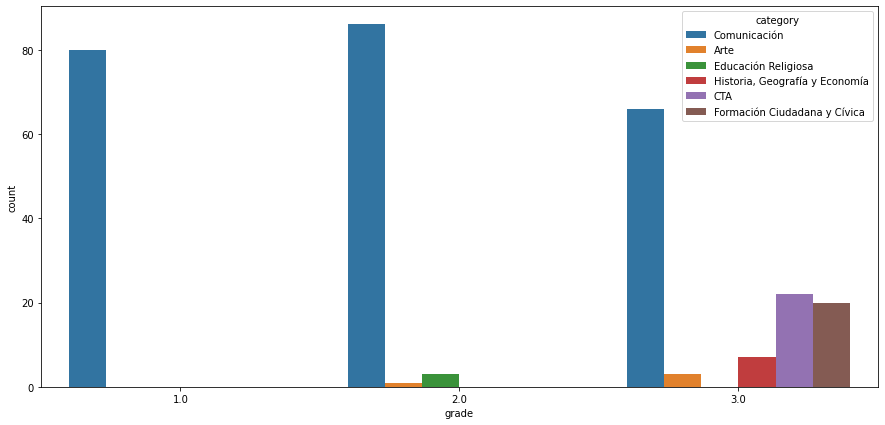

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", hue='category', data=texts, ax=ax)

### Total grades

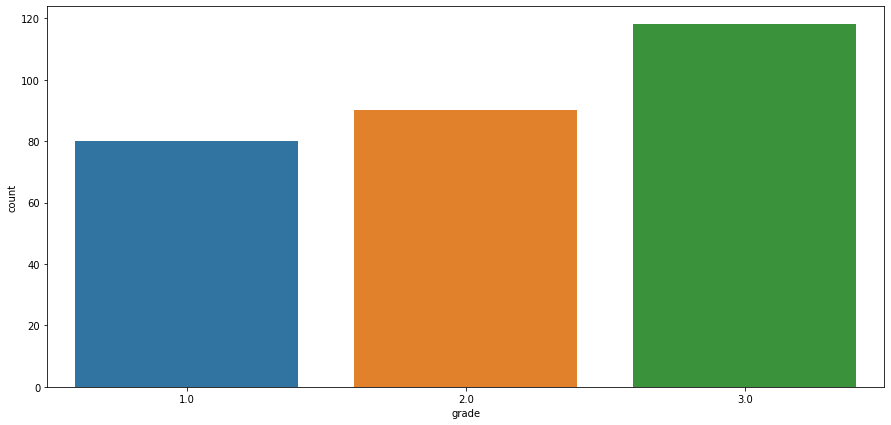

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", data=texts, ax=ax)